# Plot parallel image downsizing results

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
results_df = pd.read_csv('results.csv')
results_df

,time,threads,image_name,algorithm,speedup
0,0.017985,1,./image1_4k.jpg,Nearest,1.000000
1,0.014378,2,./image1_4k.jpg,Nearest,1.250869
2,0.012927,4,./image1_4k.jpg,Nearest,1.391274
3,0.013223,8,./image1_4k.jpg,Nearest,1.360130
4,0.012261,16,./image1_4k.jpg,Nearest,1.466846
5,0.017048,1,./image2_1080p.jpg,Nearest,1.000000
6,0.013257,2,./image2_1080p.jpg,Nearest,1.285962
7,0.012619,4,./image2_1080p.jpg,Nearest,1.350979
8,0.013418,8,./image2_1080p.jpg,Nearest,1.270532
9,0.013660,16,./image2_1080p.jpg,Nearest,1.248023


In [32]:
groups = results_df.groupby(['image_name', 'algorithm']).indices
groups

{('./image1_4k.jpg', 'Bilinear'): array([15, 16, 17, 18, 19]),
 ('./image1_4k.jpg', 'Nearest'): array([0, 1, 2, 3, 4]),
 ('./image2_1080p.jpg', 'Bilinear'): array([20, 21, 22, 23, 24]),
 ('./image2_1080p.jpg', 'Nearest'): array([5, 6, 7, 8, 9]),
 ('./image3_720p.jpg', 'Bilinear'): array([25, 26, 27, 28, 29]),
 ('./image3_720p.jpg', 'Nearest'): array([10, 11, 12, 13, 14])}

## Plot Nearest results

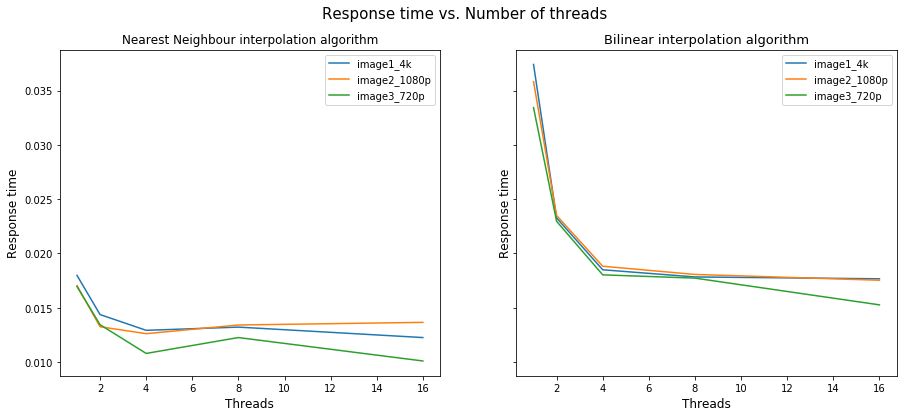

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 6))
colors = []

for keys, values in groups.items():
    data = results_df.loc[values][['threads', 'time']]
    if keys[1] == 'Nearest':
        ax1.plot(data['threads'], data['time'], label=keys[0].split('.')[1][1:])
    else:
        ax2.plot(data['threads'], data['time'], label=keys[0].split('.')[1][1:])

ax1.set_ylabel('Response time', fontsize=12)
ax1.set_xlabel('Threads', fontsize=12)
ax1.set_title('Nearest Neighbour interpolation algorithm', fontsize=12)
ax1.legend()

ax2.legend()
ax2.set_ylabel('Response time', fontsize=12)
ax2.set_xlabel('Threads', fontsize=12)
ax2.set_title('Bilinear interpolation algorithm', fontsize=13)

fig.suptitle('Response time vs. Number of threads', fontsize=15)

fig.savefig('Response time.png', dpi=400)

## Plot Bilinear results

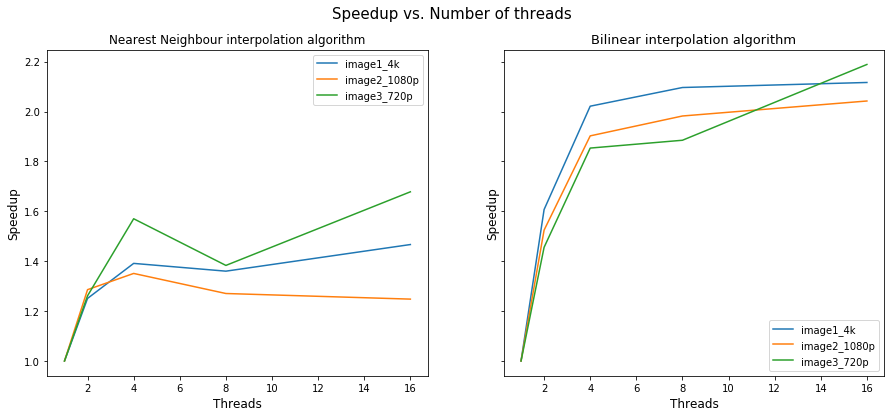

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 6))

for keys, values in groups.items():
    data = results_df.loc[values][['threads', 'speedup']]
    if keys[1] == 'Nearest':
        ax1.plot(data['threads'], data['speedup'], label=keys[0].split('.')[1][1:])
    else:
        ax2.plot(data['threads'], data['speedup'], label=keys[0].split('.')[1][1:])

ax1.set_ylabel('Speedup', fontsize=12)
ax1.set_xlabel('Threads', fontsize=12)
ax1.set_title('Nearest Neighbour interpolation algorithm', fontsize=12)
ax1.legend()

ax2.legend()
ax2.set_ylabel('Speedup', fontsize=12)
ax2.set_xlabel('Threads', fontsize=12)
ax2.set_title('Bilinear interpolation algorithm', fontsize=13)

fig.suptitle('Speedup vs. Number of threads', fontsize=15)

fig.savefig('Speedup.png', dpi=400)